In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import pickle

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report
from imblearn.over_sampling import SMOTE

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
path=r'C:\Users\resha\Downloads\Purchase itention dataset.zip'

df=pd.read_csv(path) 

df_new=df.copy()
df_new.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


In [53]:
df.shape

(9000, 9)

In [52]:
df.head(n=20)

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,Age Category
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,Young adults
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,Mid career
2,Tablets,Samsung,2606.718293,63,0,1,5,1,Pre-Retirment
3,Smartphones,Samsung,870.395450,63,1,10,3,1,Pre-Retirment
4,Tablets,Sony,1798.955875,57,0,17,3,0,Pre-Retirment
5,Smartphones,Samsung,373.148325,37,1,8,1,1,Mid career
6,Smartphones,Samsung,2330.036775,26,1,5,5,1,Early career
7,Smartphones,HP,780.101494,35,0,12,5,1,Mid career
8,Laptops,Other Brands,2264.561583,19,1,3,4,1,Young adults
9,Laptops,HP,1001.624006,66,1,8,4,1,Early Retirement


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [6]:
df.isnull().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# collect all the numerical columns 
num_col=[i for i in df.columns if df[i].dtype!='O']
object_col=[i for i in df.columns if df[i].dtype=='O']
print(num_col)
print(object_col)

['ProductID', 'ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent']
['ProductCategory', 'ProductBrand']


#### Basic non numerical analysis 

In [9]:
### Remove the custormer id 
df.drop('ProductID',inplace=True,axis=1)

In [10]:
### 
df['ProductBrand'].value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

In [11]:
df['ProductCategory'].value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

## Visualizations

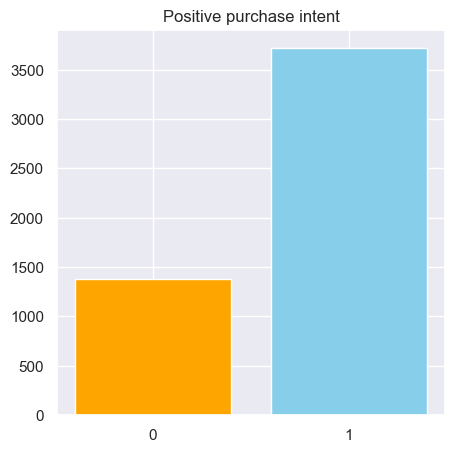

In [12]:
#visualize purchase intent on the basis of gender 
gender_pos=df['CustomerGender'][df['PurchaseIntent']==1].value_counts()
gender_neg=df['CustomerGender'][df['PurchaseIntent']==0].value_counts()


plt.figure(figsize=(5,5))
plt.bar(gender_pos.index,gender_pos,color=['skyblue','orange'])
plt.title("Positive purchase intent")
plt.xticks([0,1])
plt.show()

In [13]:
male_data=df[df['CustomerGender']==1]
female_data=df[df['CustomerGender']==0]

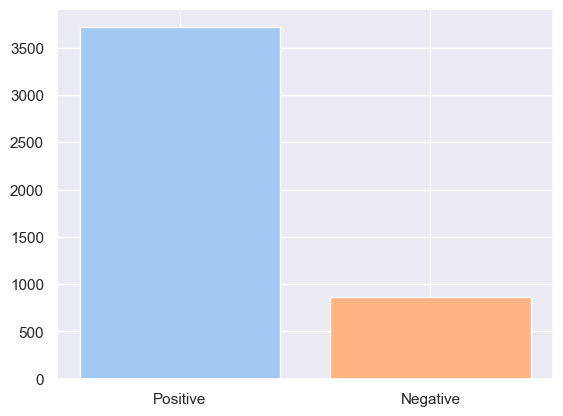

In [14]:
plt.bar(['Positive','Negative'],male_data['PurchaseIntent'].value_counts(),color=sns.color_palette('pastel')[0:3])
plt.show()

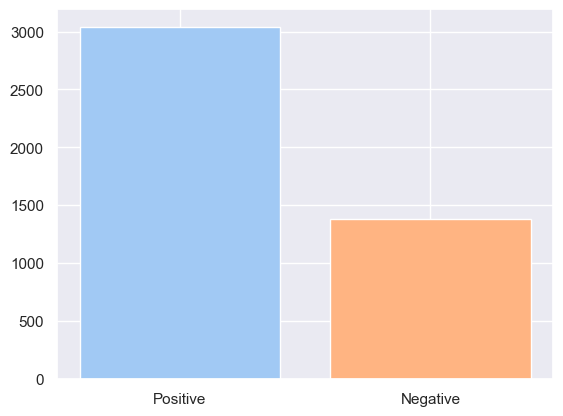

In [15]:
plt.bar(['Positive','Negative'],female_data['PurchaseIntent'].value_counts(),color=sns.color_palette('pastel')[0:3])
plt.show()

In [16]:
## save the data into the path 
basePath='C:\\Users\\resha\\OneDrive\\Desktop\Model\\'
with open(basePath+'malePurchase','wb') as file:
        pickle.dump(male_data,file)

with open(basePath+'femalePurchase','wb') as file:
        pickle.dump(female_data,file)

##### Insights: In the give data positve purchase intent exist more often than negative purchase intent 

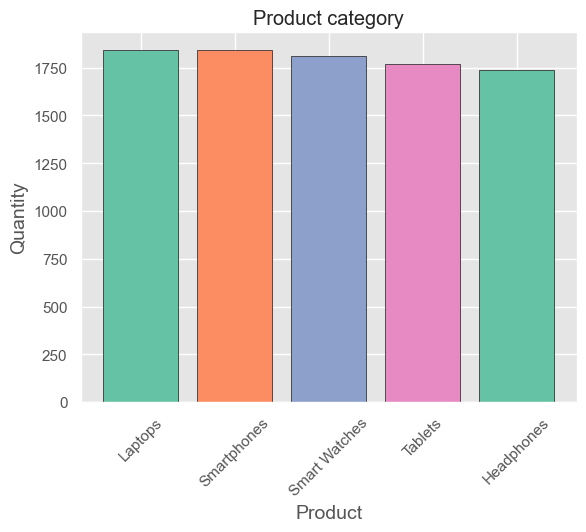

In [17]:
### ProductCategory Pie chart 
plt.style.use('ggplot')
ProductCat=df['ProductCategory'].value_counts()
plt.bar(ProductCat.index,ProductCat,color=sns.color_palette('Set2',4),edgecolor='k')
plt.title('Product category')
plt.xlabel("Product",fontsize=14)
plt.ylabel("Quantity",fontsize=14)
plt.xticks(rotation=45)
plt.show()

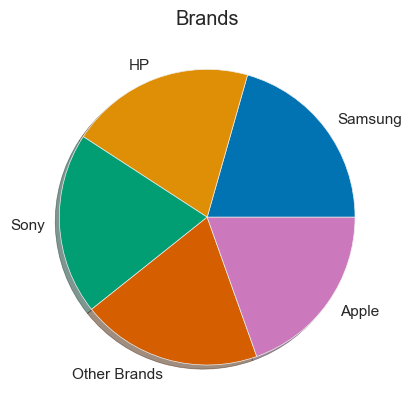

In [18]:
###
Brands=df['ProductBrand'].value_counts()
sum=Brands.sum()
plt.pie(x=Brands,labels=Brands.index,shadow=True,colors=sns.color_palette('colorblind',5))
plt.title('Brands')
plt.show()

In [19]:
df_model=df.copy()

In [20]:
Age=df['CustomerAge']
bins=[18,24,34,44,54,64,69]
labels=['Young adults','Early career','Mid career','Late career','Pre-Retirment','Early Retirement']

df['Age Category']=pd.cut(Age,bins=bins,labels=labels,right=True,include_lowest=True)

In [21]:
Age_Product=df[['ProductCategory','Age Category']]

In [22]:
Age_Product.head()

,ProductCategory,Age Category
0,Smartphones,Young adults
1,Smart Watches,Mid career
2,Tablets,Pre-Retirment
3,Smartphones,Pre-Retirment
4,Tablets,Pre-Retirment


In [23]:
### Now we have to find the Young adult product distribution 
Product_YoungAdults=((df['ProductCategory'][df['PurchaseIntent']==1])[df['Age Category']=='Young adults']).value_counts()
Product_EarlyCareer=(df['ProductCategory'][df['PurchaseIntent']==1])[df['Age Category']=='Early Career'].value_counts()
Product_MidCareer=df['ProductCategory'][df['Age Category']=='Mid career'].value_counts()
Product_LateCareer=df['ProductCategory'][df['Age Category']=='Late career'].value_counts()
Product_PreRetirment=df['ProductCategory'][df['Age Category']=='Pre-Retirment'].value_counts()
Product_EarlyRetirement=df['ProductCategory'][df['Age Category']=='Early Retirement'].value_counts()

In [24]:
basePath='C:\\Users\\resha\\OneDrive\\Desktop\Model\\'
age_bins=['Young adults','Early Career','Mid career','Late career','Pre-Retirment','Early Retirement']
data_bins=[Product_YoungAdults,Product_EarlyCareer,Product_MidCareer,Product_LateCareer,Product_PreRetirment,Product_EarlyRetirement]
for i in range(len(age_bins)):
    data_frame=pd.DataFrame(
        {
            'ProductCategory':data_bins[i].index,
            'Counts':data_bins[i].to_numpy()
        }
    )
    with open(basePath+age_bins[i],'wb') as file:
        pickle.dump(data_frame,file)

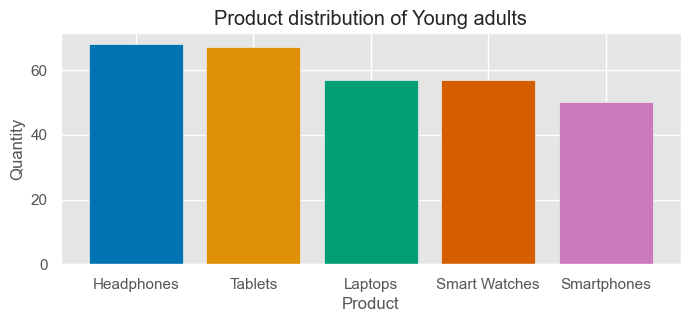

In [25]:
plt.figure(figsize=(8,3))
plt.bar(Product_YoungAdults.index,Product_YoungAdults,color=sns.color_palette('colorblind',5))
plt.title("Product distribution of Young adults")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.savefig('Yound_adults_choice_count.png')
plt.show()

In [26]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,Age Category
0,Smartphones,Other Brands,312.949668,18,0,2,1,0,Young adults
1,Smart Watches,Samsung,980.389404,35,1,7,2,1,Mid career
2,Tablets,Samsung,2606.718293,63,0,1,5,1,Pre-Retirment
3,Smartphones,Samsung,870.395450,63,1,10,3,1,Pre-Retirment
4,Tablets,Sony,1798.955875,57,0,17,3,0,Pre-Retirment


In [27]:
df['PurchaseFrequency'].min()

1

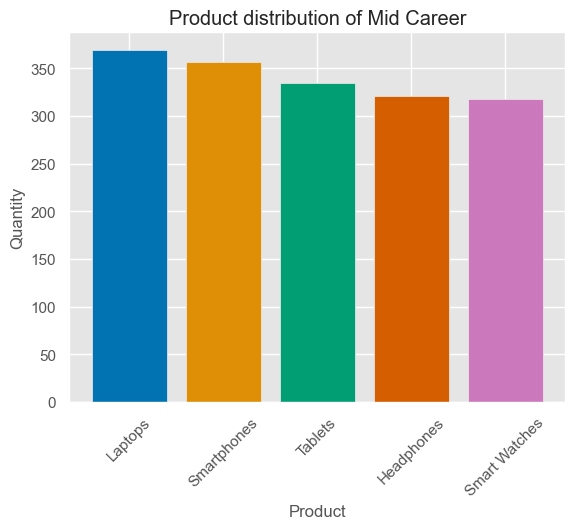

In [28]:
plt.bar(Product_MidCareer.index,Product_MidCareer,color=sns.color_palette('colorblind',5))
plt.title("Product distribution of Mid Career")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

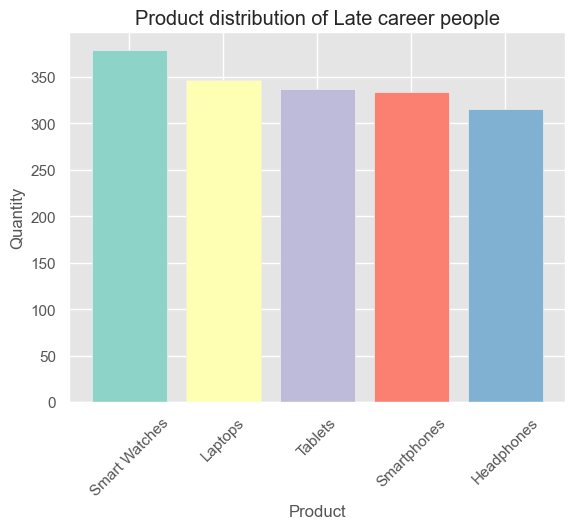

In [29]:
plt.bar(Product_LateCareer.index,Product_LateCareer,color=sns.color_palette('Set3',5))
plt.title("Product distribution of Late career people")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

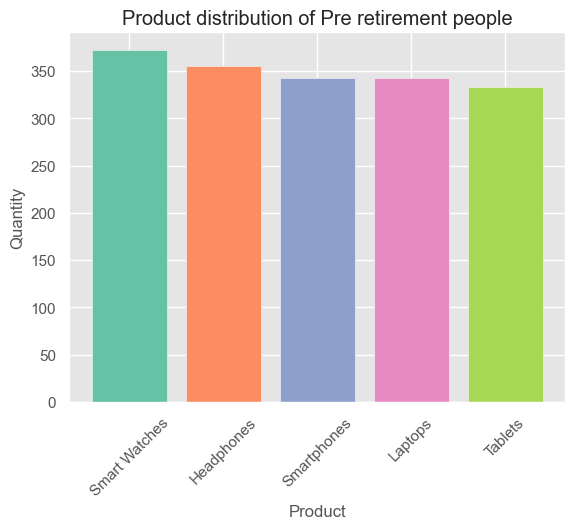

In [30]:
plt.bar(Product_PreRetirment.index,Product_PreRetirment,color=sns.color_palette('Set2',5))
plt.title("Product distribution of Pre retirement people")
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

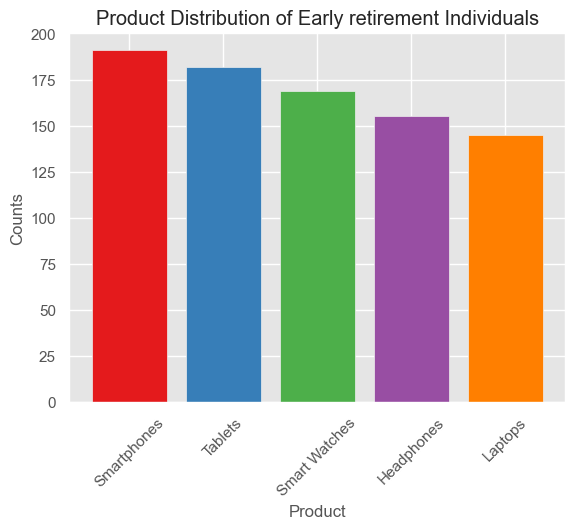

In [31]:
plt.bar(Product_EarlyRetirement.index,Product_EarlyRetirement,color=sns.color_palette('Set1',5))
plt.title('Product Distribution of Early retirement Individuals')
plt.xlabel("Product")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

##### Insights: Early retirement individuals buy smartphones more than other products

##### Product segmentation on the basis of Customer gender 

In [32]:
Product_Male=df['ProductCategory'][df['CustomerGender']==1].value_counts()
Product_Female=df['ProductCategory'][df['CustomerGender']==0].value_counts()

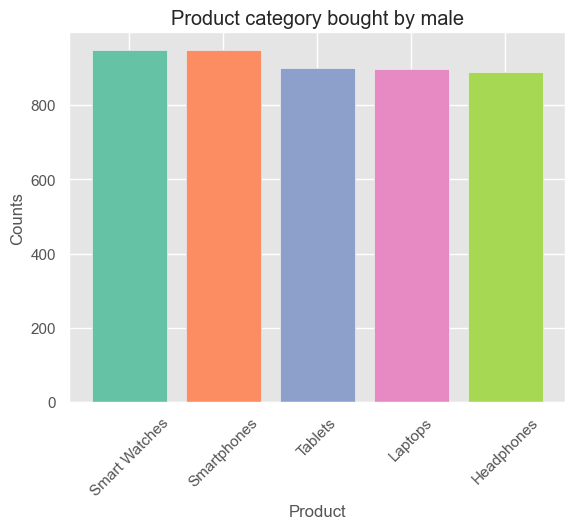

In [33]:
plt.bar(Product_Male.index,Product_Male,color=sns.color_palette('Set2',5))
plt.title('Product category bought by male')
plt.xlabel('Product')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

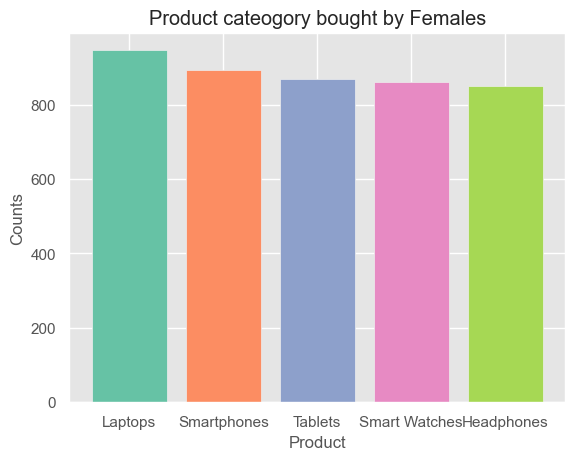

In [34]:
plt.bar(Product_Female.index,Product_Female,color=sns.color_palette('Set2',5))
plt.title('Product cateogory bought by Females')
plt.xlabel('Product')
plt.ylabel('Counts')
plt.show()

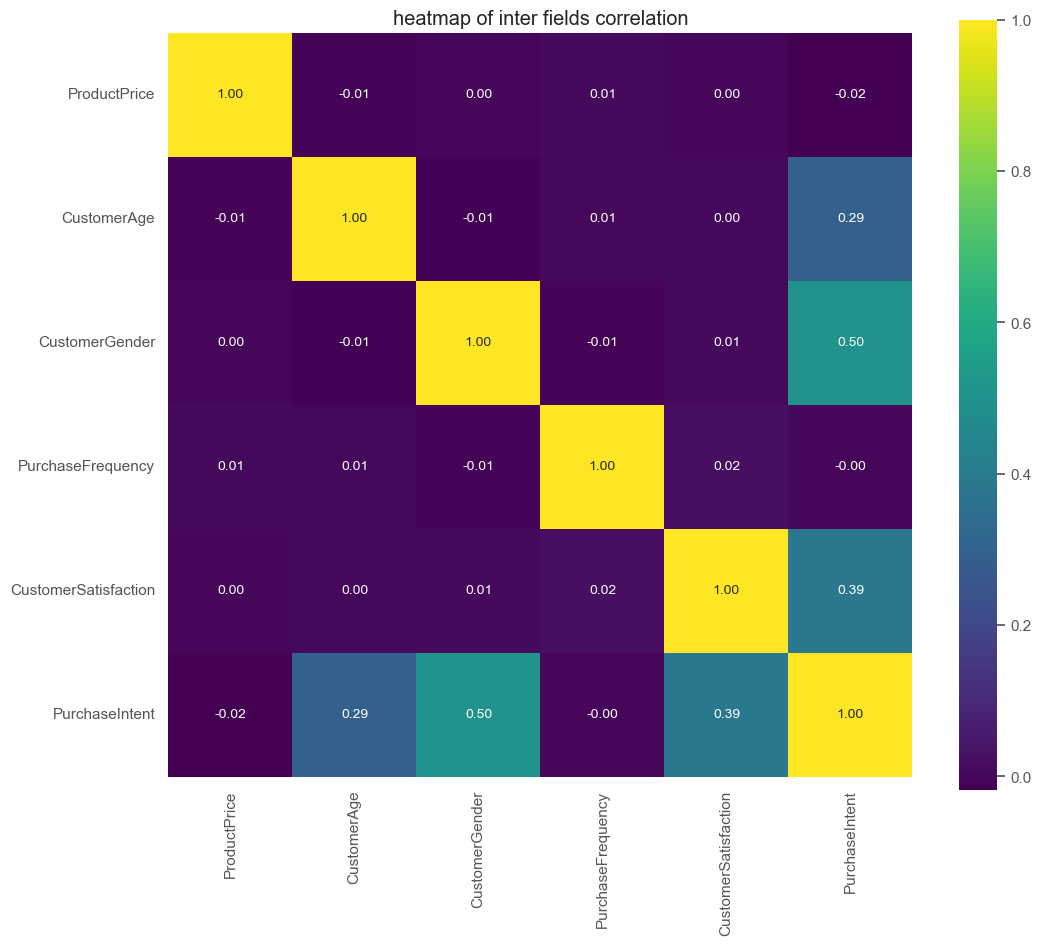

In [35]:
Numerical_col=['ProductPrice', 'CustomerAge', 
               'CustomerGender', 
               'PurchaseFrequency', 
               'CustomerSatisfaction', 
               'PurchaseIntent', 
               ]

df_num=df[Numerical_col]

plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(),square=True,annot=True,fmt='.2f',cmap='viridis')
plt.title('heatmap of inter fields correlation')
plt.show()

# Model building 

In [36]:
### All function required 
def boolean_to_int(data):
    '''Convert boolean fields to integer fields 
    '''
    for i in data.columns:
        if data[i].dtypes=='bool':
            data[i]=data[i].astype('int')
    return data

def classification_to_df(report):
    frame=pd.DataFrame([i.split() for i in report.split('\n')])
    frame=frame.reset_index().drop(columns=['index'])
    return frame

In [37]:
df_model=pd.get_dummies(df_new,columns=['ProductCategory','ProductBrand'])

In [38]:
df_model.head()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
0,5874,312.949668,18,0,2,1,0,False,False,False,True,False,False,False,True,False,False
1,5875,980.389404,35,1,7,2,1,False,False,True,False,False,False,False,False,True,False
2,5876,2606.718293,63,0,1,5,1,False,False,False,False,True,False,False,False,True,False
3,5877,870.395450,63,1,10,3,1,False,False,False,True,False,False,False,False,True,False
4,5878,1798.955875,57,0,17,3,0,False,False,False,False,True,False,False,False,False,True


In [39]:
df_model=boolean_to_int(df_model)

In [40]:
df_model.head()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
0,5874,312.949668,18,0,2,1,0,0,0,0,1,0,0,0,1,0,0
1,5875,980.389404,35,1,7,2,1,0,0,1,0,0,0,0,0,1,0
2,5876,2606.718293,63,0,1,5,1,0,0,0,0,1,0,0,0,1,0
3,5877,870.395450,63,1,10,3,1,0,0,0,1,0,0,0,0,1,0
4,5878,1798.955875,57,0,17,3,0,0,0,0,0,1,0,0,0,0,1


In [41]:
df_model.columns

Index(['ProductID', 'ProductPrice', 'CustomerAge', 'CustomerGender',
       'PurchaseFrequency', 'CustomerSatisfaction', 'PurchaseIntent',
       'ProductCategory_Headphones', 'ProductCategory_Laptops',
       'ProductCategory_Smart Watches', 'ProductCategory_Smartphones',
       'ProductCategory_Tablets', 'ProductBrand_Apple', 'ProductBrand_HP',
       'ProductBrand_Other Brands', 'ProductBrand_Samsung',
       'ProductBrand_Sony'],
      dtype='object')

In [42]:
X_train,X_test,y_train,y_test=train_test_split(df_model.drop(columns=['PurchaseIntent']),df_model['PurchaseIntent'])

In [43]:
### Balancing the classes 
balancer=SMOTE()
X_train_resampled,y_train_resampled=balancer.fit_resample(X_train,y_train)

In [44]:
model=RandomForestClassifier()
model.fit(X_train_resampled,y_train_resampled);
y_predict=model.predict(X_test)

In [45]:
X_train.head()

,ProductID,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,ProductCategory_Headphones,ProductCategory_Laptops,ProductCategory_Smart Watches,ProductCategory_Smartphones,ProductCategory_Tablets,ProductBrand_Apple,ProductBrand_HP,ProductBrand_Other Brands,ProductBrand_Samsung,ProductBrand_Sony
4878,10752,2544.425766,59,0,16,4,0,0,0,0,1,1,0,0,0,0
6279,12153,1805.446644,45,0,5,4,0,0,0,1,0,0,0,1,0,0
3114,8988,2846.594581,23,0,10,5,1,0,0,0,0,0,0,0,1,0
2708,8582,781.197516,56,1,16,1,0,0,0,1,0,0,0,0,1,0
7560,13434,2233.349777,52,0,19,1,1,0,0,0,0,0,0,0,1,0


In [46]:
X_train_resampled.columns

Index(['ProductID', 'ProductPrice', 'CustomerAge', 'CustomerGender',
       'PurchaseFrequency', 'CustomerSatisfaction',
       'ProductCategory_Headphones', 'ProductCategory_Laptops',
       'ProductCategory_Smart Watches', 'ProductCategory_Smartphones',
       'ProductCategory_Tablets', 'ProductBrand_Apple', 'ProductBrand_HP',
       'ProductBrand_Other Brands', 'ProductBrand_Samsung',
       'ProductBrand_Sony'],
      dtype='object')

#### Model Evaluation

In [47]:
pd.DataFrame(confusion_matrix(y_test,y_predict),columns=['Predicted Negative','Predicted Positive'],index=['Actual Negative','Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,918,38
Actual Positive,51,1243


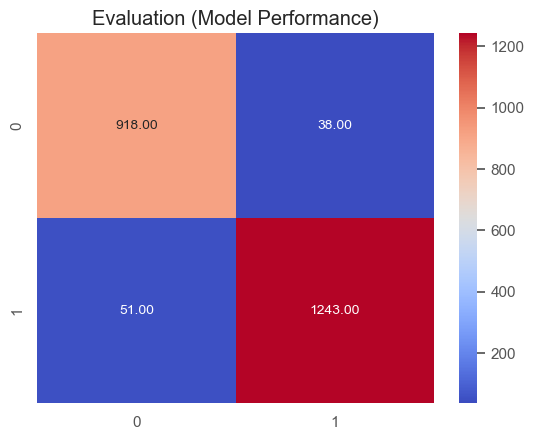

In [48]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Evaluation (Model Performance)")
plt.show()

In [49]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       956
           1       0.97      0.96      0.97      1294

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250



In [2]:
import pickle 
import warnings

warnings.filterwarnings('ignore')
path=r"C:\Users\User\OneDrive\Desktop\Model\CustomerIntentPredictionModel"


with open(path,'rb') as file:
    model=pickle.load(file)

In [3]:
prediction=model.predict([[2896.057855,4,0,2,4,1,0,0,0,0,1,0,0,0,0]])[0]

if (prediction==0):
    print("Customer would not buy")
else:
    print("Customer would buy")

Customer would not buy
